In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

In [2]:
# Read data from Google Drive to use Google Colab
from google.colab import drive

drive.mount('/content/drive')

train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/test.csv')

Mounted at /content/drive


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_set.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
x_data = train_set.drop('price_range', axis=1)
x_data = StandardScaler().fit_transform(x_data)  # Standardize data
y_data = train_set['price_range']

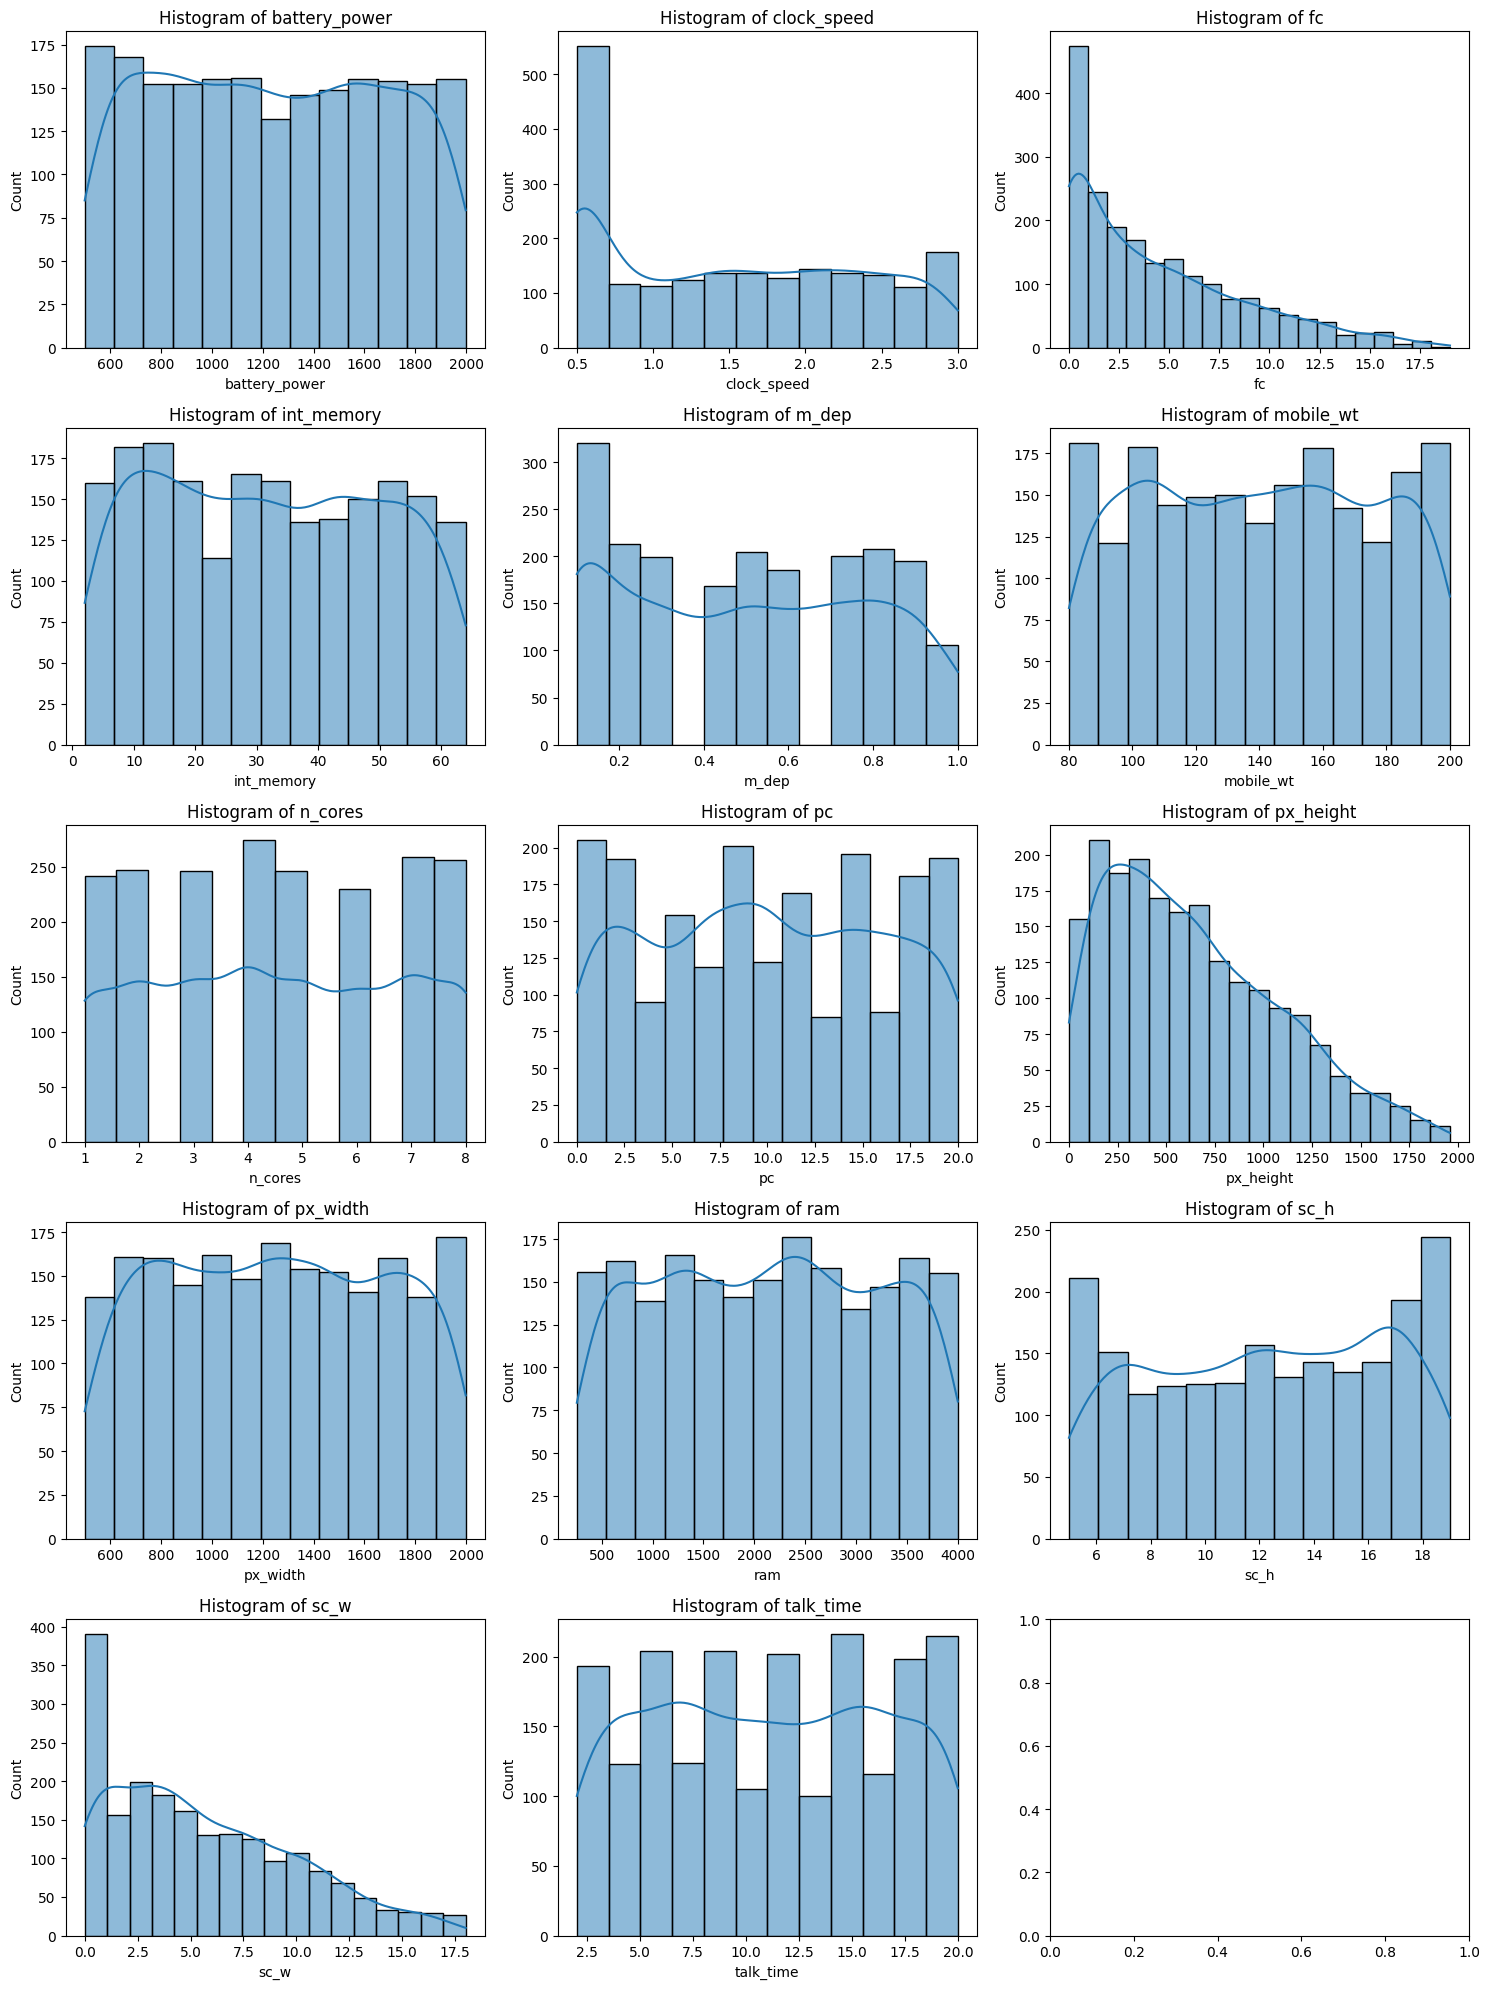

In [6]:
columns = train_set.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'],
                         axis=1).columns

figs, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=train_set, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

<ipython-input-7-37f71d488199>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-37f71d488199>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-37f71d488199>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-7-37f71d488199>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

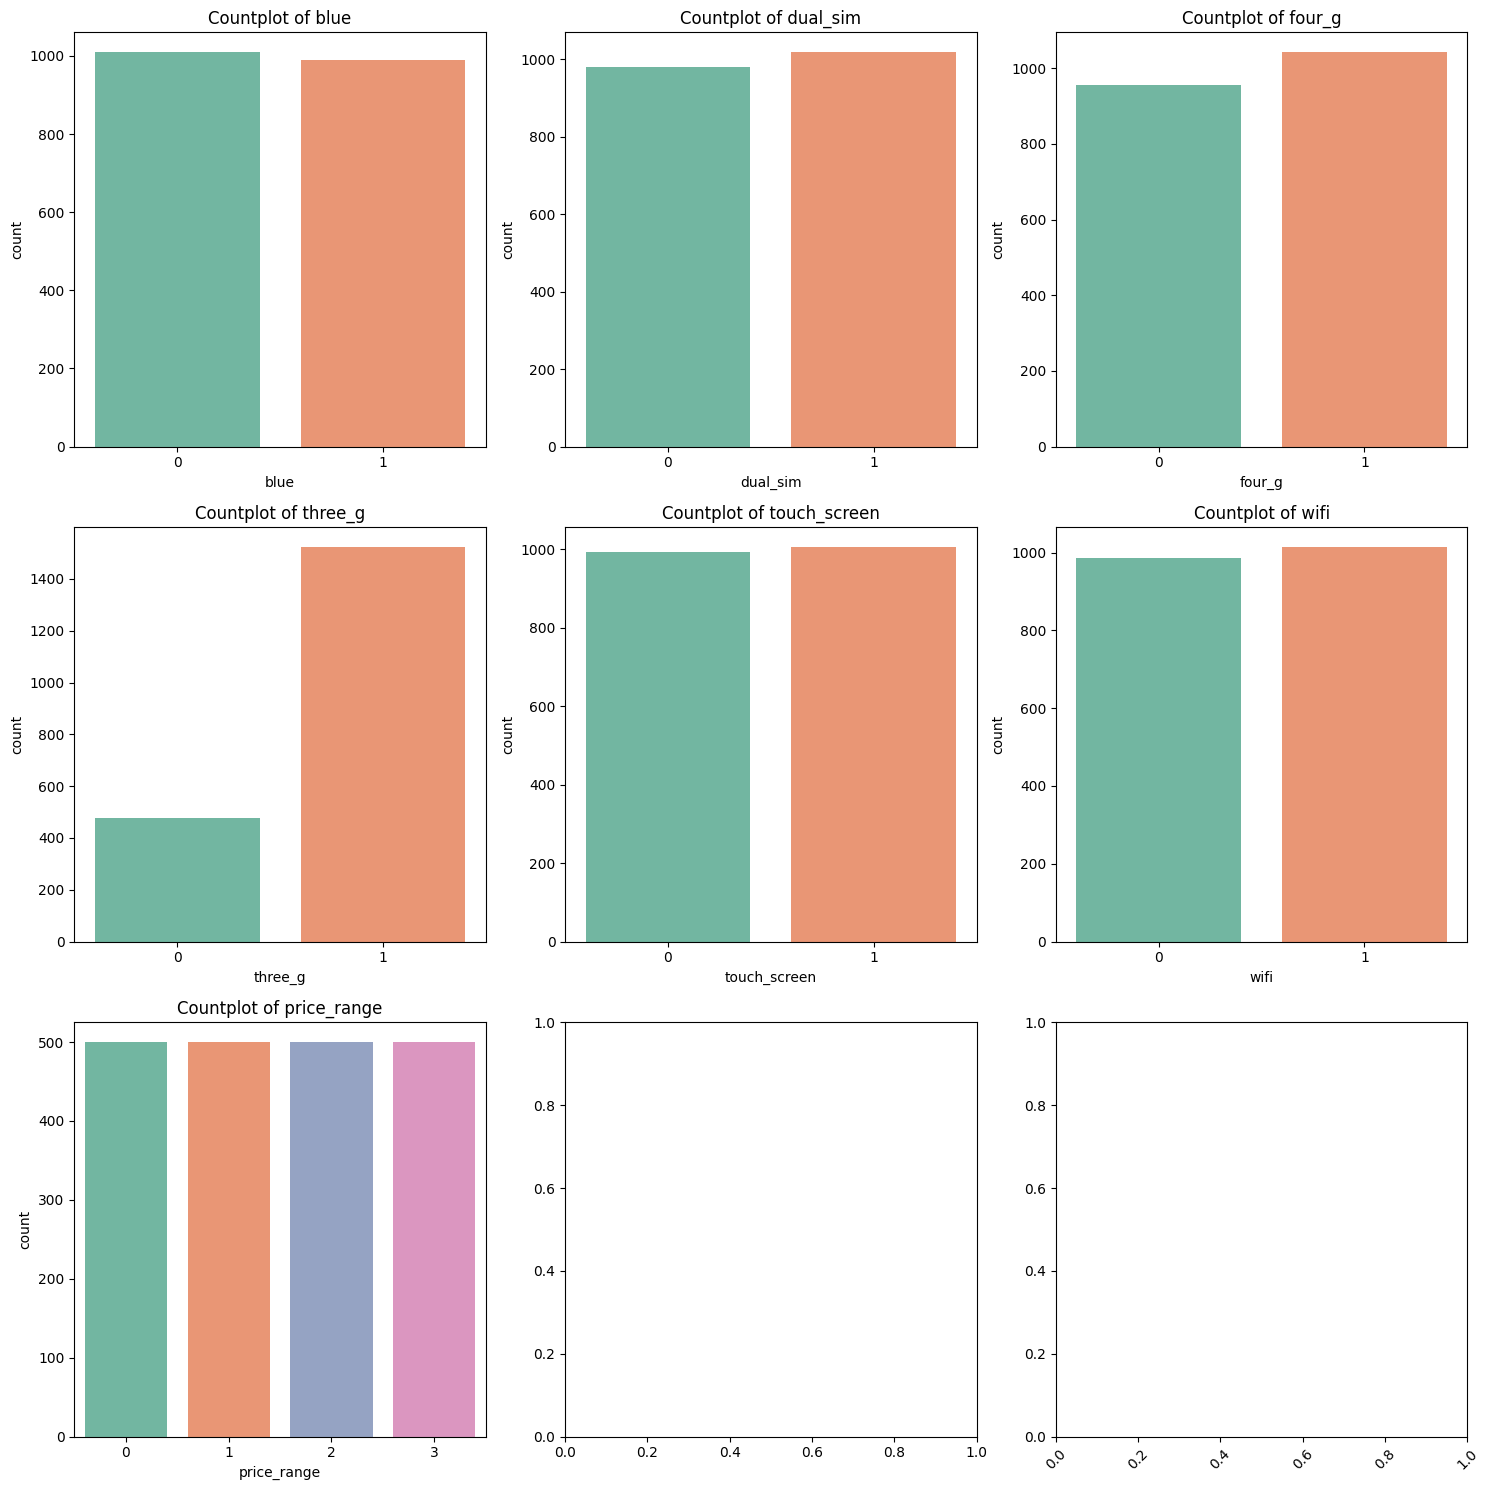

In [7]:
columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=train_set, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Countplot of {col}")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
original_train = train_set.drop('price_range', axis=1)
encoded_train = one_hot_encoder.fit_transform(original_train[categorical_features])
train_df = pd.DataFrame(encoded_train, columns=one_hot_encoder.get_feature_names_out(categorical_features))
numerical_features_train = original_train.drop(categorical_features, axis=1)
x_data = pd.concat([numerical_features_train, train_df], axis=1)

# Standardize the data after one-hot encoding
x_data = StandardScaler().fit_transform(x_data)

# Split train set and evaluation set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

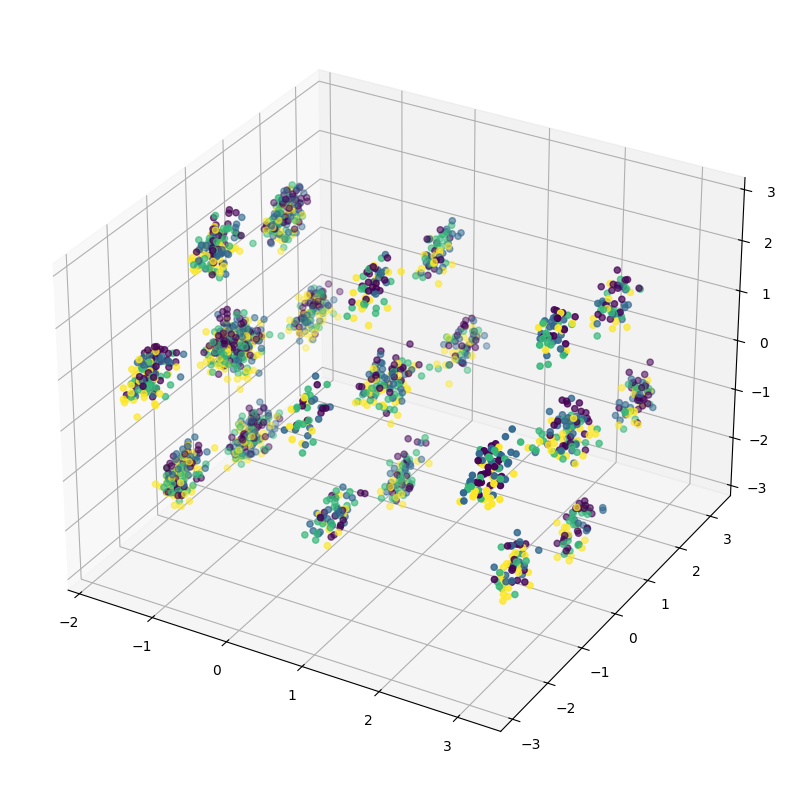

In [9]:
# Dimensional reduction
pca = PCA(n_components=3, random_state=42)
x_data_pca = pca.fit_transform(x_data)

# Data Visualization
pca_x = x_data_pca[:, 0]
pca_y = x_data_pca[:, 1]
pca_z = x_data_pca[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_x, pca_y, pca_z, c=y_data, cmap='viridis')

In [10]:
# Naive Bayes Classifier
start_time = time.perf_counter()
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)
end_time = time.perf_counter()

# Evaluate model
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Execution time: 0.011698070000022653 seconds
Accuracy: 0.7925
Recall: 0.7925
Precision: 0.8018951163797122
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.75      0.67      0.71        91
           2       0.63      0.77      0.70        92
           3       0.89      0.80      0.85       112

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.79      0.79       400



In [11]:
# Softmax Regression
start_time = time.perf_counter()
softmax = LogisticRegression(max_iter=200, solver='saga')
softmax.fit(x_train, y_train)
y_pred = softmax.predict(x_test)
end_time = time.perf_counter()

# Evaluate model
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Execution time: 0.3263594709999893 seconds
Accuracy: 0.975
Recall: 0.975
Precision: 0.9759457776352783
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [12]:
# Support Vector Machine
start_time = time.perf_counter()
svm = SVC(kernel='linear', C=10)  # Soft margins
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
end_time = time.perf_counter()

# Evaluate model
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Execution time: 0.34709272099999566 seconds
Accuracy: 0.9725
Recall: 0.9725
Precision: 0.9740761397408509
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.92      1.00      0.96        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [13]:
# Multi Layers Perceptron
start_time = time.perf_counter()
ann = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
ann.fit(x_train, y_train)
y_pred = ann.predict(x_test)
end_time = time.perf_counter()

# Evaluate model
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Execution time: 4.122640126000022 seconds
Accuracy: 0.9225
Recall: 0.9225
Precision: 0.9235708528711533
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.89      0.93      0.91        91
           2       0.88      0.89      0.89        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [15]:
test_set.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [16]:
test_id = test_set['id']
x_test_set = test_set.drop('id', axis=1)
x_test_set = StandardScaler().fit_transform(x_test_set)

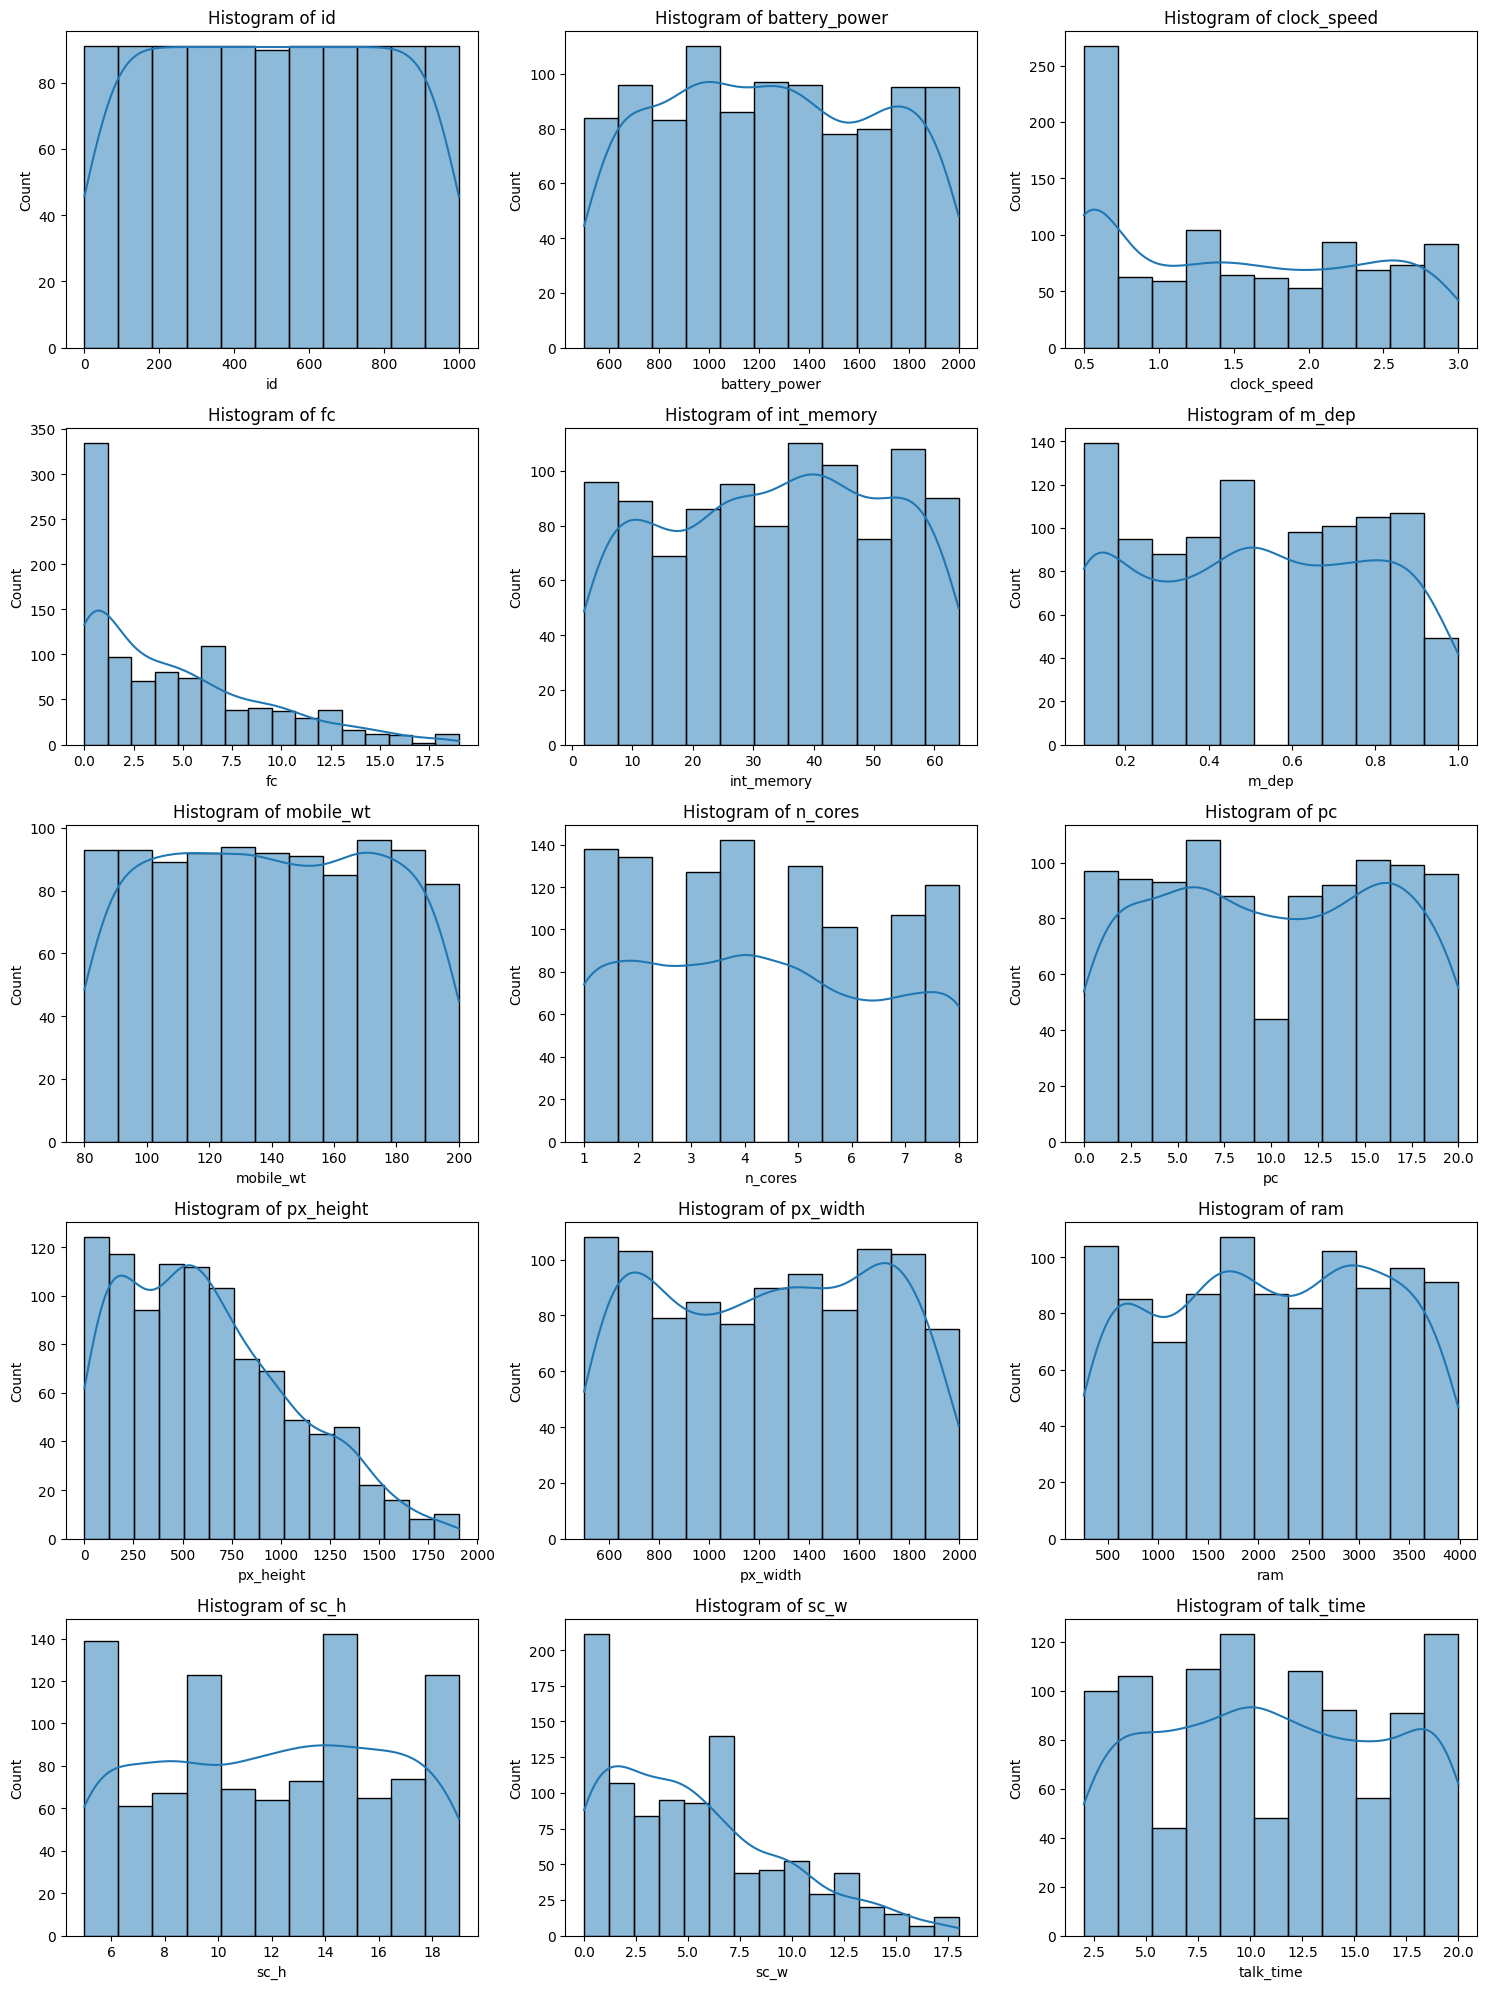

In [17]:
columns = test_set.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis=1).columns

figs, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=test_set, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

<ipython-input-18-c3b5b2faa2f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-18-c3b5b2faa2f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-18-c3b5b2faa2f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_set, x=col, ax=axes[i], palette="Set2")
<ipython-input-18-c3b5b2faa2f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

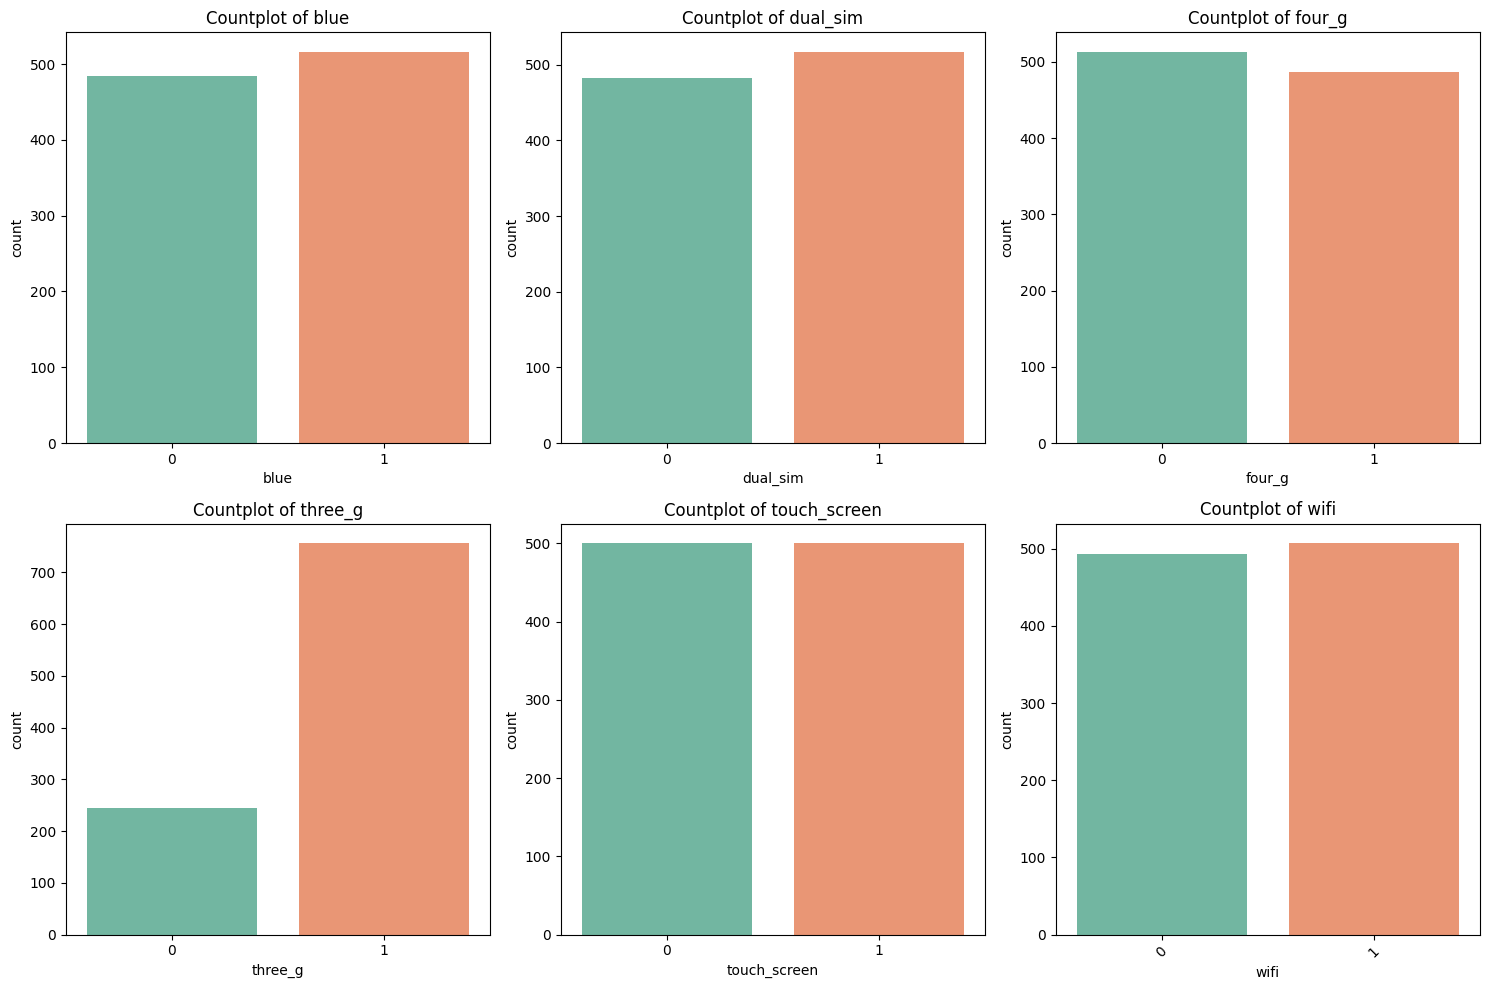

In [18]:
columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=test_set, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Countplot of {col}")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# One-hot encoding
original_test = test_set.drop('id', axis=1)
encoded_test = one_hot_encoder.transform(original_test[categorical_features])
test_df = pd.DataFrame(encoded_test, columns=one_hot_encoder.get_feature_names_out(categorical_features))
numerical_features_test = original_test.drop(categorical_features, axis=1)
x_test_set = pd.concat([numerical_features_test, test_df], axis=1)

# Standardize the data after one-hot encoding
x_test_set = StandardScaler().fit_transform(x_test_set)

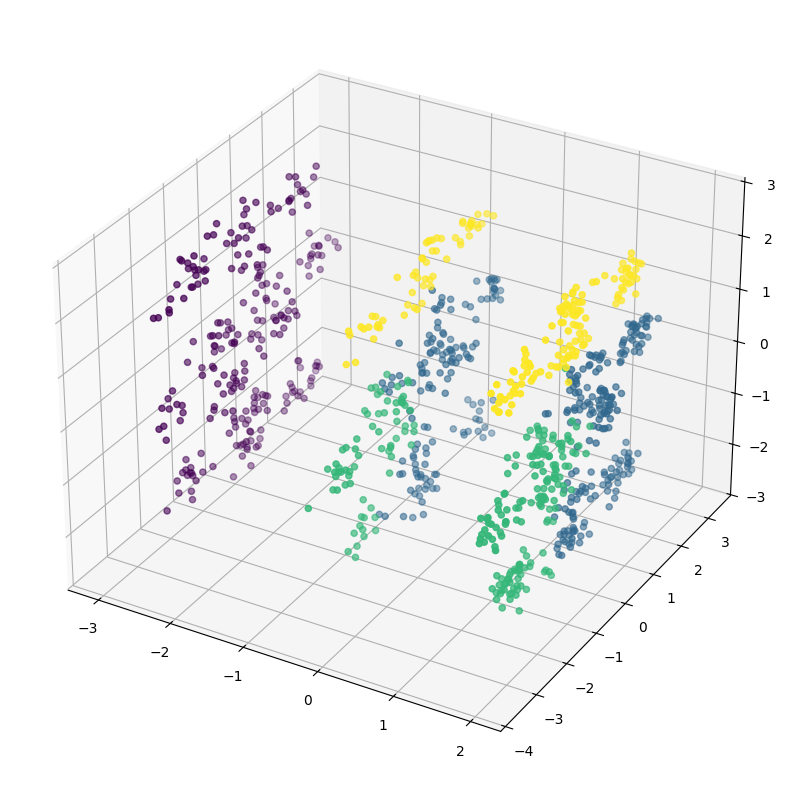

In [20]:
# Dimensional reduction
x_test_set_pca = pca.fit_transform(x_test_set)

# Clustering data
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(x_test_set_pca)

# Data Visualization
pca_x = x_test_set_pca[:, 0]
pca_y = x_test_set_pca[:, 1]
pca_z = x_test_set_pca[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_x, pca_y, pca_z, c=clusters, cmap='viridis')

In [21]:
y_predict = softmax.predict(x_test_set)

for id, res in zip(test_id, y_predict):
    if res == 0:
        res = "Low cost"
    elif res == 1:
        res = "Medium cost"
    elif res == 2:
        res = "High cost"
    else:
        res = "Very High cost"
    print(f"Phone {id} has {res} price")

Phone 1 has Very High cost price
Phone 2 has Very High cost price
Phone 3 has High cost price
Phone 4 has Very High cost price
Phone 5 has Medium cost price
Phone 6 has Very High cost price
Phone 7 has Very High cost price
Phone 8 has Medium cost price
Phone 9 has Very High cost price
Phone 10 has Low cost price
Phone 11 has Very High cost price
Phone 12 has Very High cost price
Phone 13 has Low cost price
Phone 14 has Low cost price
Phone 15 has High cost price
Phone 16 has Low cost price
Phone 17 has High cost price
Phone 18 has Medium cost price
Phone 19 has Very High cost price
Phone 20 has High cost price
Phone 21 has Medium cost price
Phone 22 has Very High cost price
Phone 23 has Medium cost price
Phone 24 has Medium cost price
Phone 25 has Very High cost price
Phone 26 has Low cost price
Phone 27 has High cost price
Phone 28 has Low cost price
Phone 29 has Very High cost price
Phone 30 has Low cost price
Phone 31 has High cost price
Phone 32 has Low cost price
Phone 33 has Very